<a href="https://colab.research.google.com/github/adezxc/VU-Bioinformatics/blob/master/semester4/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

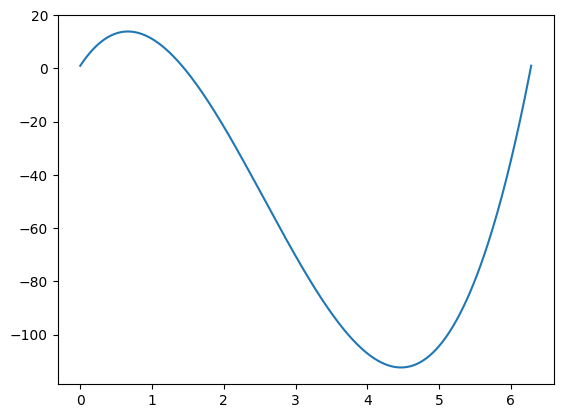

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_data(a, b, n, f):
    results_x = [a, b]

    for num in range(n-2):
      rand_number = random.random() * (b - a) + a
      results_x.append(rand_number)

    results_y = [f(x) for x in results_x]
    f = open("data.txt", "w")
    for i in range(n):
      f.write(str(results_x[i]) + " " + str(results_y[i]) + "\n")

    f.close()


def lagrange_interpolation(x, y, x_interp):
    n = len(x)
    y_interp = np.zeros_like(x_interp)

    for j in range(len(x_interp)):
        for i in range(n):
            L = 1
            for k in range(3):
                if k != i:
                    L *= (x_interp[j] - x[k]) / (x[i] - x[k])
            y_interp[j] += y[i] * L

    return y_interp


def main():
    generate_data(0, 2*np.pi, 20, np.cos)

    data = np.loadtxt('data.txt')
    x = data[:, 0]
    y = data[:, 1]

    a = np.min(x)
    b = np.max(x)

    y_a = np.min(x)
    y_b = np.max(x)

    N = len(x)
    N_squared = N**2

    x_interp = np.linspace(a, b, N_squared)




    y_interp = lagrange_interpolation(x, y, x_interp)

    plt.plot(x_interp, y_interp, label='Interpoliuoti duomenys')
    plt.show()


    # for j in range(len(x_interp)):
    #     print(f"x{j} = {x_interp[j]}, y{j} = {y_interp[j]}")

if __name__ == '__main__':
    main()
